In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

clase 24/10/2019

#### Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.	

## Clasificación

Técnica incluída entre las técnicas de **aprendizaje automático (machine learning).**

Consiste en la asignación de una categoría o clase a un objeto/individuo o a un conjunto de objetos/individuos .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos/información tenemos de estos y 
* cuales o cuantas serían las posibles categorias o clases.

Podemos diferenciar dos tipos de clasificación:

**Supervisada** y **No supervisada**

En **clasificación supervisada** se requiere tener a disposición un conjunto de ejemplos (muestras u objetos) ya clasificados (tiene que ser numeroso y representativo). Con este conjunto (o una parte de él) se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento. La parte que no se usa para entrenamiento se guarda para test y/o validación.

En clasificación **No supervisada**  (en estadística también llamada clustering) no se conocen a priori datos ya clasificados y en general tampoco la cantidad de clases que se pretenden encontrar. Se busca descubrir alguna estructura presente en los datos y encontrar las clases naturales que se presentan, también llamadas clusters (por su nombre en inglés). 

Veamos un ejemplo de datos disponibles para **clasificación supervisada**:

Para esto usaremos librerías útiles para **aprendizaje automático** y **bases de datos**:


**scikit-learn: sklearn** y **pandas** respectivamente

In [12]:
#librería scikit-learn (sklearn) tiene a disposición bases de datos, usaremos una de ellas

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from statistics import mode
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN  # Librerías para Clustering
from sklearn.neighbors import KNeighborsClassifier

In [3]:
datos = load_wine() # base de datos 'wine', la guardamos en la variable datos

print('base de datos: {}'.format(type(datos)))
print()
print('matriz de datos:  tamaño = {} y tipo'.format(datos.data.shape, type(datos.data)))
print()
print('X = {}'.format(datos.data))
print()
print('nombre de las columnas/variables/features : tipo = {}'.format(type(datos.feature_names)))
print()
print(datos.feature_names)
print()
print('etiquetas: tamaño = {} y tipo = {}'.format(datos.target.shape, type(datos.target)))
print()
print('y = {}'.format(datos.target))

base de datos: <class 'sklearn.utils.Bunch'>

matriz de datos:  tamaño = (178, 13) y tipo

X = [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

nombre de las columnas/variables/features : tipo = <class 'list'>

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

etiquetas: tamaño = (178,) y tipo = <class 'numpy.ndarray'>

y = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

**Base de datos wine: Un problema de clasificación sencillo con varias clases (multi-class, no binario)**

**178 muestras de tres clases (59 de la clase 0, 71 de la clase 1 y 48 de la clase 2)**

**De cada muestra tenemos 13 datos/variables/features medidas**

(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

*En resumen: Son 178 registros (ejemplos/objetos/instancias o muestras) con 13 datos/características/variables/features
En este ejemplo cada registro ya está etiquetado en una de 3 clases*

### Armado de la tabla con datos: Data Frame mediante librería pandas

In [4]:
# armado de base de datos: tipo Data Frame
df = pd.DataFrame(datos.data, columns=datos.feature_names)

print('tamaño de la tabla sólo de los datos (sin contar las etiquetas): {}'.format(df.shape))

df.head(6) #se muestran las primeras 6 líneas/filas/ejemplos

tamaño de la tabla sólo de los datos (sin contar las etiquetas): (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [5]:
df.tail(6) #las últimas 6 filas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.7,0.62,1.71,660.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


### Etiquetas/target  
Etiquetas numéricas codificadas

In [6]:
print(datos.target)
# 128 etiquetas , con 3 etiquetas diferentes, codificadas con 
# 0 la class_0
# 1 la class_1
# 2 la class_2

print(type(datos.target[0]))
print(datos.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.int64'>
['class_0' 'class_1' 'class_2']


#### Se agrega columna con el etiquetado a la tabla df

In [7]:
df['etiquetas'] = datos.target
df.head(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,etiquetas
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0


### Gráfico de la base

**primero sin considerar las etiquetas/clases**

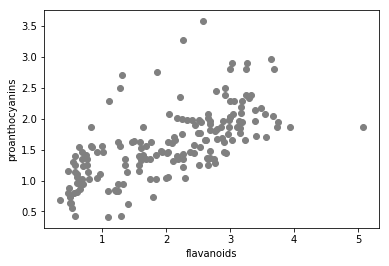

In [9]:
#LAs muestras viven en un espaciio de dimensión 13, pues hay 13 variables, 13 datos por cada muestra
## de proyectará a un espacio de 2 dimensiones para graficar, se seleccionarán de a dos las variables
### Eleccción de las dos variables: 
variable1 = datos.feature_names[6] # si j=6, séptima variable
variable2 = datos.feature_names[8] # si l=8, novena variable
x = df[variable1]
y = df[variable2]

print()
plt.scatter(x, y, c='gray')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

**cada punto (par) $(X_{i,j}, X_{i,l})$, es la i-ésima muestra/vino/fila de las dos mediciones/columnas elegidas: $j$ y $l$. Hay 168 pares en la gráfica**

**Ejercicio: En el último bloque de código cambie las variables seleccionadas por otras dos e interprete**

### Gráfico de la base

**Ahora coloreando las muestras/pares (vinos) según las etiquetas (target/clase $y_{i}$ de la i-ésima muestra)**

In [11]:
j = 1 # número (entre 0 y 12) de la variable/columna para graficar en el eje horizontal
l = 3 # número (entre 0 y 12) de la variable/columna para graficar en el eje vertical
var1 = datos.feature_names[j] #nombre de la variable en horizontal
var2 = datos.feature_names[l] #nombre de la variable en vertical

plt.scatter(df[var1][y_train==0], df[var2][y_train==0], c='orange')   # clase 0, color naranja
plt.scatter(df[var1][y_train==1], df[var2][y_train==1], c='blue')     # clase 1, color azul
plt.scatter(df[var1][y_train==2], df[var2][y_train==2], c='purple' )  # clase 2, color violeta

# agregamos al gráfico los nombres de las variables que se graficaron
plt.xlabel(var1) #eje horizontal
plt.ylabel(var2) #eje vertical

plt.legend(labels=('class_0', 'class_1', 'class_1'))
plt.title('Scatter Plot 2D de base etiquetada')
plt.show()

NameError: name 'y_train' is not defined

**cada par $(X_{i,j}, X_{i,l})$, se pinta de naranja si $y_i=0$, azul si $y_i=1$ y violeta si $y_i=2$**

### Se divide la base en 2 subconjuntos: 70% para Entrenamiento y 30% para Test (también se suele usar 80%-20%)

In [ ]:
#se dividen "aleatoriamente" los datos acompañados de las etiquetas correspondientes:

X_train, X_test, y_train, y_test = train_test_split(datos.data,datos.target,
                                                    test_size=0.3,
                                                    random_state=167) 
#el último parámetro es la semilla para que sea reproducible la selección (pseudo-aleatoria)

#### Verificamos los tamaños de cada subconjunto de la base, 

In [ ]:
print('tamaños de c/u:  train  test')
print(' - datos:    ',X_train.shape,X_test.shape)
print(' - etiquetas:  ', y_train.shape,y_test.shape)

In [ ]:
#armado de las nuevas bases de datos. Entrenamiento
df_train = pd.DataFrame(X_train, columns=datos.feature_names)
df_train['etiqueta']=y_train
df_train.tail(3)

In [ ]:
#Base de datos para test
df_test = pd.DataFrame(X_test, columns=datos.feature_names)
df_test.tail(3)

#### Base de entrenamiento (en colores, según etiqueta) y datos de test (en gris, no se considera la etiqueta)

**Se grafican de a dos variables a la vez** eligiendo j y l

Ejercicio: Pruebe diferentes pares de variables y responda. ¿Existe algun par (proyección en espacio bidimensional) en donde las clases se vean separables? y separables linealmente? 

In [ ]:
j = 1 #número (entre 0 y 12) de la variable/columna para graficar en el eje horizontal
l = 10 #número (entre 0 y 12) de la variable/columna para graficar en el eje vertical
var1 = datos.feature_names[j] #nombre de la variable en horizontal
var2 = datos.feature_names[l] #nombre de la variable en vertical

plt.scatter(df_train[var1][y_train==0], df_train[var2][y_train==0], c='orange')#clase 0, color naranja
plt.scatter(df_train[var1][y_train==1], df_train[var2][y_train==1], c='blue')# clase 1, color azul
plt.scatter(df_train[var1][y_train==2], df_train[var2][y_train==2], c='purple')#clase 2, color violeta
plt.scatter(df_test[var1], df_test[var2], c='gray')#datos de test grises sin considerar su etiqueta
plt.scatter(df_test[var1][0], df_test[var2][0], c='red')#primera observación del grupo de test en rojo

#agregamos al gráfico los nombres de las variables que se graficaron
plt.xlabel(var1)#eje horizontal
plt.ylabel(var2)#eje vertical

plt.legend(labels=('class_0', 'class_1', 'class_1','test','1st test??'))
plt.title('Scatter Plot')
plt.show()

Ejercicio: ¿Cómo clasificaría a la primera observación de grupo de test (pintada de rojo) usando la gráfica de dos variables?
y a la última?

Verifique si ambas elecciones fueron correctas

## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

Primero Abordaremos 

### Clasificación dentro de una imagen

Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

**Ejemplo: Imagen monocroma**

El ejemplo más simple es cuando la imagen es monocroma una sola medida para cada pixel: la intensidad.

**binarización: 2 clases, puede ser clase 1: objetos y clase 2: fondo **

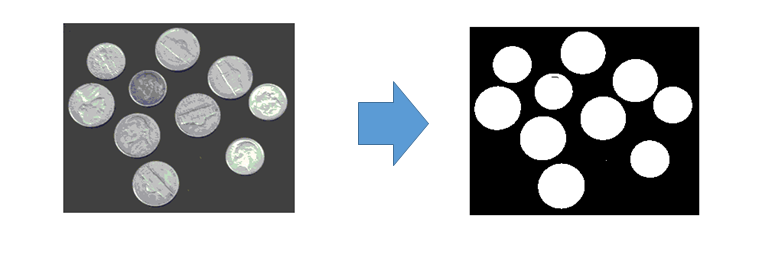

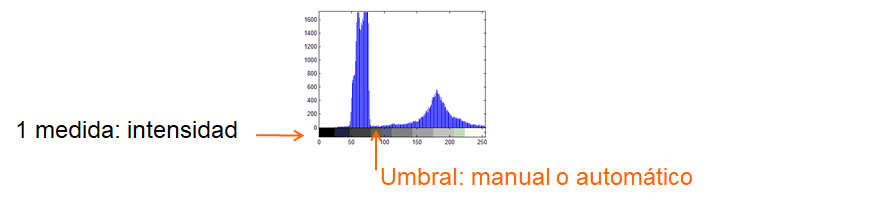

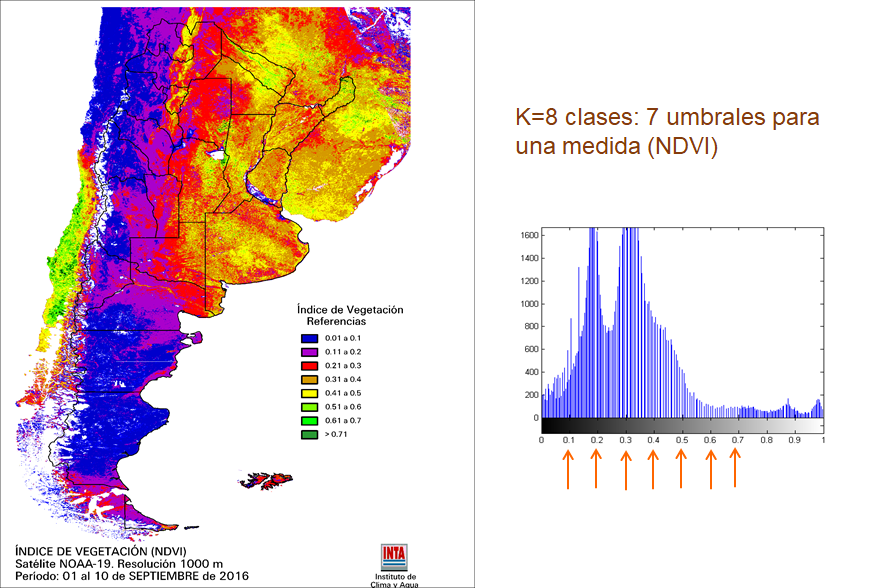

**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$ 

donde $IRC$ es el Infrarrojo cercano 
y $r$ es la componente roja (del visible)

**Imágenes en general:** Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos), según el tipo de imagen.

**Ejemplo:** imágenes a color RGB

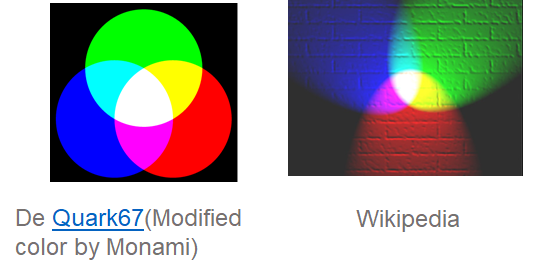

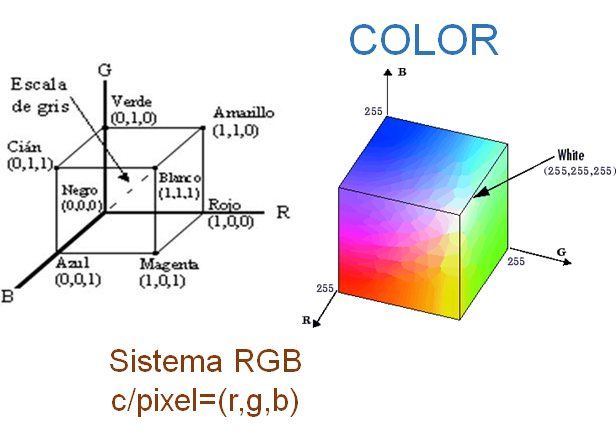

In [14]:
campo = cv2.imread('../img/Campo.png')
cv2.imshow('pulse una tecla aquí', campo)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

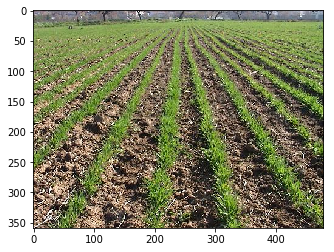

In [15]:
plt.imshow(campo[:,:,[2,1,0]])
plt.show()

### Armado de la base de pixeles como Data Frame

In [16]:
dims = campo.shape
cant_filas = dims[0]
cant_columnas = dims[1]
cant_pixeles = cant_filas * cant_columnas
data0 = np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro = f * cant_columnas+c
        data0[nro,0] = nro
        data0[nro,1:4] = campo[f,c,:]

df = pd.DataFrame(data0, columns=["pixel_id", "azul", "verde", "rojo"])

print(df.shape)
print('Base de pixeles:')
df.head()   

(171961, 4)
Base de pixeles:


,pixel_id,azul,verde,rojo
0,0,161,155,186
1,1,176,171,202
2,2,165,159,190
3,3,177,172,203
4,4,164,160,189


### Visualización de los datos en 3D (BxGxR)

el próximo bloque demora un poco al correrse, paciencia...

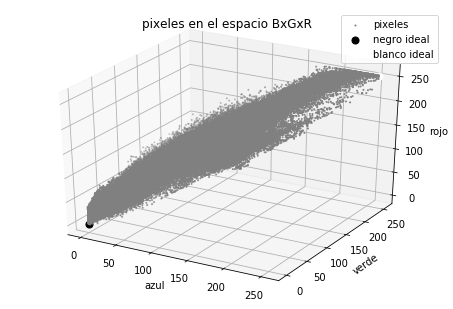

In [17]:
fig = plt.figure()
ax = Axes3D(fig)

variables = ["azul", "verde", "rojo"]
x1 = df[variables[0]].values 
x2 = df[variables[1]].values
x3 = df[variables[2]].values

ax.scatter(x1, x2, x3, c='gray', s=1)
ax.scatter(0, 0 ,0 , c='black', s=50)
ax.scatter(255, 255, 255, c='white', s=50)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
ax.set_title('pixeles en el espacio BxGxR')
ax.legend(labels=('pixeles', 'negro ideal', 'blanco ideal'))
plt.show()

## ¿Clasificación no supervisada? Clustering: K-medias, mean shift,Dbscan ... 

### K-means o k-medias
**Es un método automático de clasificación no supervisada. En este caso K es la cantidad de clases, es un parámetro del algoritmo, el usuario lo tiene que elgir ( hiperparámetro del algoritmo).**
* genera aleatoriamente K centroides en el espacio de las variables (dimensión n=cantidad de variables/features).
* casifica los datos en K clases por cercanía (menor distancia euclídea) a los centroides.
* recalcula los K centroides usando el centro de masa (promedio) de cada clase.
* se repite el proceso de clasificación y recálculo de los centroides hasta la estabilidad (K clases estables)

In [18]:
df_pix = df.drop('pixel_id', axis=1) #se quita la columna de identificación de pixel de la base

#se define el clasificador K-medias  con K=3
#se lo corre/entrena/ajusta con los pixeles la imagen
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pix)

#se define una base de datos que incluya los resultados
df_clusters = df.copy()
df_clusters['kmedias_3'] = kmeans.labels_
df_clusters.head()

,pixel_id,azul,verde,rojo,kmedias_3
0,0,161,155,186,1
1,1,176,171,202,1
2,2,165,159,190,1
3,3,177,172,203,1
4,4,164,160,189,1


### Visualización
En del espacio BxGxR en 2D

se grafican de a dos (dimensión 2)


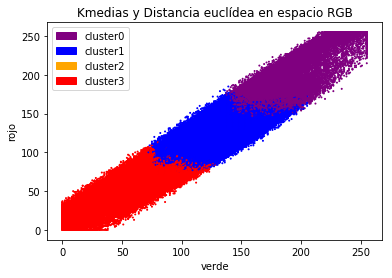

In [19]:
colores = ['purple', 'blue', 'orange', 'red']
variables = ["rojo", "verde", "azul"]

variable1 = variables[1]
variable2 = variables[0]

f1 = df_clusters[variable1].values
f2 = df_clusters[variable2].values
f3 = df_clusters.kmedias_3

asignar = []
l = len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster0')
patch2 = mpatches.Patch(color=colores[1], label='cluster1')
patch3 = mpatches.Patch(color=colores[2], label='cluster2')
patch4 = mpatches.Patch(color=colores[3], label='cluster3')
plt.legend(handles=[patch1, patch2, patch3, patch4])
plt.title('Kmedias y Distancia euclídea en espacio RGB')
plt.show()

### Visualización del "clusterizado" en la imagen

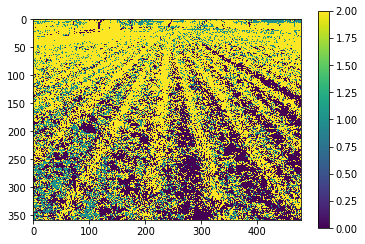

In [20]:
a = campo.shape #(fila, columna ,3)
clasif_campo = kmeans.labels_.reshape(a[0], a[1]) #etiquetas ubicadas en los lugares de la imagen

plt.imshow(clasif_campo)
plt.colorbar()
plt.show()

## Clasificación supervisada

### k-nearest neibours -- k-vecinos más cercanos

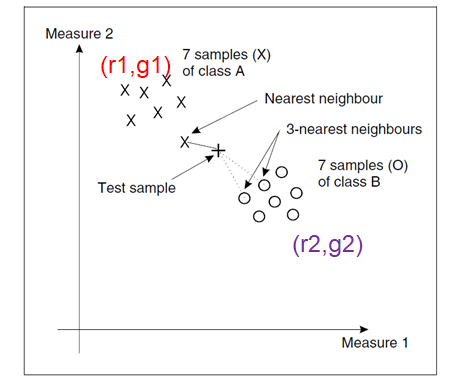

**Clasificación supervisada? ejemplos etiquetados? no hay, se pueden etiquetar algunos: **
### Clasificación supervisada / semi-supervisada.

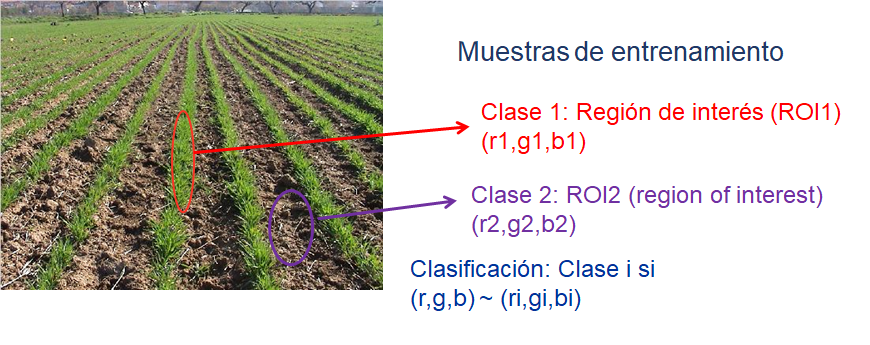

### Etiquetado manual: Usando selección de ROI (Region Of Interest/Región de interés)

### ROI 1: Cultivo

In [21]:
showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (200, 150, 35, 176)
(columna, fila, anchocol, anchofila)


### ROI 2: Suelo

In [22]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI2: (146, 166, 55, 116)
(columna, fila, anchocol, anchofila)


### ROI 1: Fondo

In [23]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI3: (266, 4, 0, 0)
(columna, fila, anchocol, anchofila)


In [24]:
#roi1=(211, 180, 25, 72) #descomentar las tres primeras líneas si no se pudieron delimitar las ROI
#roi2=(136, 241, 47, 106)
#roi3=(145, 1, 121, 14)
rois=[roi1, roi2, roi3]

**Además del azul, verde y rojo, se pueden agregar más capas/columnas de datos/información, por ejemplo**
* **capas con bordes (Filtros Prewitt, Sobel, etc.)**
* **capas con información de textura (Filtros de Gabor, etc.)**


In [25]:
bordes = cv2.Sobel(campo, cv2.CV_64F, 1, 1, ksize=5)#capa de bordes ()

campo2=np.zeros((bordes.shape[0], bordes.shape[1],6)) # defino una imagen con 6 canales

campo2[:,:,0:3] = campo #3 primeros canales imagen original
campo2[:,:,3:6] = bordes # 3 últimos canales con bordes
print(campo2.shape)

(359, 479, 6)


### Armado de la base de entrenamiento ampliada

In [27]:
cantidad = 0
for i in range(3):
    cantidad += (rois[i][2] * rois[i][3])

print(cantidad)

data = np.zeros([cantidad, 6])
target = np.zeros(cantidad)
cuenta = 0
for i in range(3):
    roi = rois[i]

    for fil in range (roi[1], roi[1]+roi[3]):
        for col in range (roi[0], roi[0]+roi[2]):
            data[cuenta,:] = campo2[fil,col,:]
            target[cuenta] = i
            cuenta += 1

print(cuenta)    

df = pd.DataFrame(data, columns=["azul", "verde", "rojo", "bordes_azul", "bordes_verde", "bordes_rojo"])
print(df.shape)
print('target = {} | dimensión target = {}'.format(target, target.shape))
df.head(10)

12540
12540
(12540, 6)
target = [0. 0. 0. ... 1. 1. 1.] | dimensión target = (12540,)


,azul,verde,rojo,bordes_azul,bordes_verde,bordes_rojo
0,111.0,122.0,136.0,350.0,387.0,355.0
1,95.0,108.0,122.0,-343.0,-372.0,-420.0
2,73.0,85.0,103.0,-524.0,-595.0,-635.0
3,35.0,49.0,68.0,85.0,66.0,55.0
4,0.0,3.0,23.0,580.0,595.0,603.0
5,0.0,4.0,24.0,313.0,316.0,337.0
6,19.0,30.0,50.0,-387.0,-383.0,-354.0
7,17.0,28.0,48.0,-900.0,-880.0,-854.0
8,18.0,29.0,49.0,-667.0,-644.0,-639.0
9,94.0,108.0,127.0,39.0,55.0,35.0


### Gráfico en 2D de los datos

cantidad de observaciones: 12540
cantidad de clases: 3
cantidad de variables/dimension: 6
se grafican de a dos (dimensión 2)


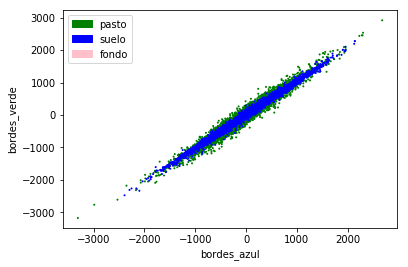

In [28]:
colores = ['green', 'blue', 'pink']
variables = ["azul", "verde", "rojo", "bordes_azul", "bordes_verde", "bordes_rojo"]

variable1 = variables[3]
variable2 = variables[4]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar = []
l = len(f3)
print('cantidad de observaciones: {}'.format(l))
print('cantidad de clases: {}'.format(3))
print('cantidad de variables/dimension: {}'.format(6))
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if f3[i] == 0:
        asignar.append(colores[0])
    elif f3[i] == 1:
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])

plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)

patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')

plt.legend(handles=[patch1, patch2, patch3])
plt.show()

### Gráfico en 3D de los datos

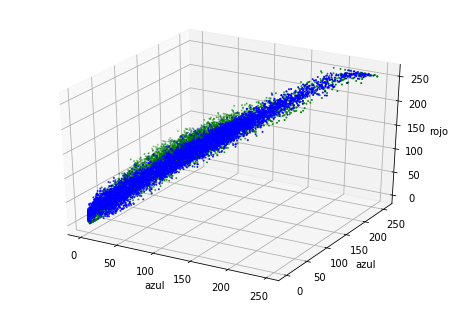

In [30]:
j = 0 #3 números de variables a elegir entre 0 y 6  
l = 1
m = 2

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[j]].values, df[variables[l]].values, df[variables[m]].values, c=asignar, s=1)
ax.set_xlabel(variables[j])
ax.set_ylabel(variables[j])
ax.set_zlabel(variables[m])
plt.show()

**k-Nearest Neighbor con Scikit Learn Definimos el valor de k en 5 **

In [31]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors) #se define el clasificador
knn.fit(data, target) #se lo entrena/ajusta con los datos de entrenamiento
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data, target)))
print('Específicamente el {:.2f}% de los datos de entrenamiento fueron clasificados correctamente'
     .format(100 * knn.score(data, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.83
Específicamente el 83.35% de los datos de entrenamiento fueron clasificados correctamente


**Y el resto de la imagen??? Clasifiquemos la imagen completa usando el clasificacor entrenado**
**Este proceso demora, paciencia...**

In [32]:
a = campo.shape
print(a)

clasif = np.zeros(a[0:2])
print(knn.predict([[40, 80, 40, 0,0, 255]]))

for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j] = knn.predict([campo2[i,j,:]])
        
print('No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen')
print('Realizaremos una valoración visual')       

(359, 479, 3)
[1.]
No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen
Realizaremos una valoración visual


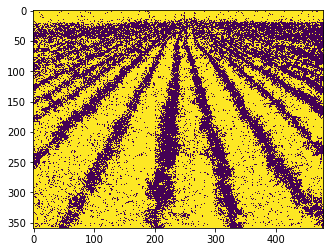

In [33]:
plt.imshow(clasif)
plt.show()

## Mejora de la clasificación

* Filtro o algoritmo de modas (iterado)
* Moda: es el valor más repetido

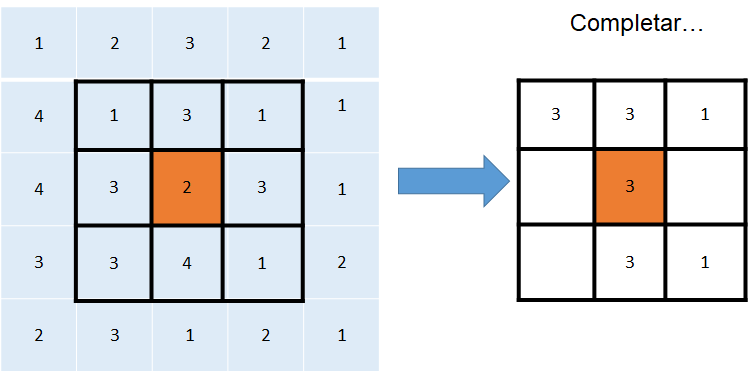

In [34]:
clasif2 = clasif.copy()
for i in range(2, a[0]-2): #filas
    for j in range(2, a[1]-2): #columnas
        try:
            clasif2[i,j] = mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except Exception:
            clasif2[i,j]= clasif[i,j] 

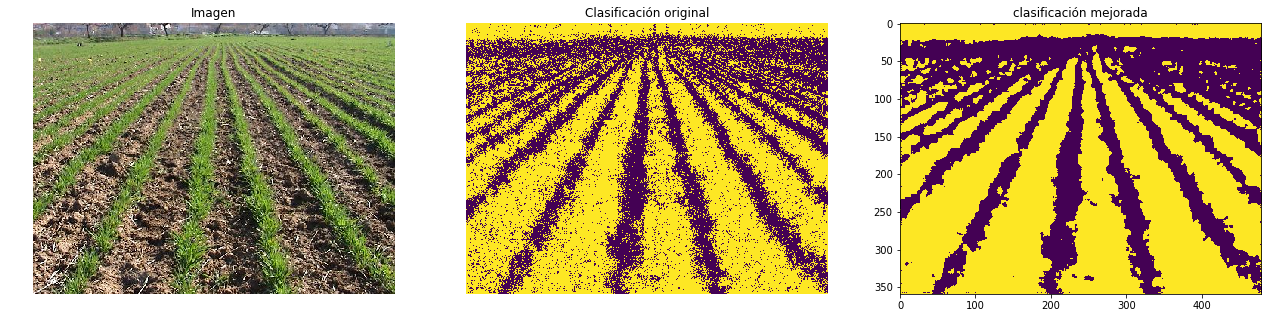

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(22)

axs[0].imshow(campo[:,:,[2,1,0]])
axs[0].set_title("Imagen")
axs[0].axis('off')

axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')

axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')

plt.show()

## Clasificación de varias imágenes  (taggeo)

In [36]:
digitos = cv2.imread('../img/digits.png')

cv2.imshow('pulse una tecla aqui', digitos)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

In [37]:
print(type(digitos))

<class 'numpy.ndarray'>


In [38]:
digits = datasets.load_digits()
print(digits.data.shape)

df = pd.DataFrame(digits.data)
df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**Cada fila contiene los 64 pixeles de la imagen de un dígito** 

hay 1797 imágenes/muestras de 8x8 con 10 tipos/clases de dígitos

**Gráfica de una de esas imágenes:**


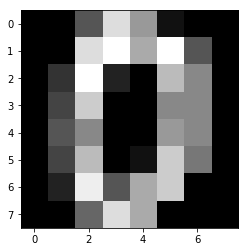

In [39]:
primero = np.reshape(digits.data[0,:], [8,8])
plt.imshow(primero, cmap='gray')
plt.show()